In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import warnings

from PSF_Preprocessing import get_PSF_frames, get_PSF_frames_movie_list, show_PSFs, load_tif_movies
from PSFDataset import MultiPSFDataset

In [2]:
A647_movies = load_tif_movies(r'Raw Data\New Data\A647')
CF660_movies = load_tif_movies(r'Raw Data\New Data\CF660c')
combined_movies = load_tif_movies(r'Raw Data\New Data\Both')
print(len(A647_movies), len(CF660_movies), len(combined_movies))

6 8 6


In [3]:
# Take every 5th frame to reduce overlapping PSFs
A647_movies_training = [movie[::5] for movie in A647_movies[0:4]]
CF660_movies_training = [movie[::5] for movie in CF660_movies[0:4]]
combined_movies_training = [movie[::5] for movie in combined_movies[0:4]]
A647_movies_validation = [movie[::5] for movie in [A647_movies[4]]]
CF660_movies_validation = [movie[::5] for movie in [CF660_movies[4]]]
combined_movies_validation = [movie[::5] for movie in [combined_movies[4]]]
A647_movies_testing = [movie[::5] for movie in [A647_movies[5]]]
CF660_movies_testing = [movie[::5] for movie in [CF660_movies[5]]]
combined_movies_testing = [movie[::5] for movie in [combined_movies[5]]]

In [4]:
minmass = 1500
separation = 15
diameter = 9
frame_size = 19
percentile =99.5
movie_frames = [0, 10, 25, 50, 100, 150]
plot = False
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    if plot:
        A647_PSFs_training = get_PSF_frames(A647_movies_training[0], minmass, separation, diameter, frame_size, 
                                            percentile, print_progress=False, to_plot=True, movie_frames=movie_frames)
    A647_PSFs_training = get_PSF_frames(A647_movies_training[0], minmass, separation, diameter, frame_size, 
                                        percentile, print_progress=True, to_plot=False)
    # A647_PSFs_training = get_PSF_frames_movie_list(A647_movies_training, minmass, separation, 
    #                                                diameter, frame_size, percentile, print_progress=True)

100%|██████████| 200/200 [00:12<00:00, 16.23it/s]


(4945, 19, 19)


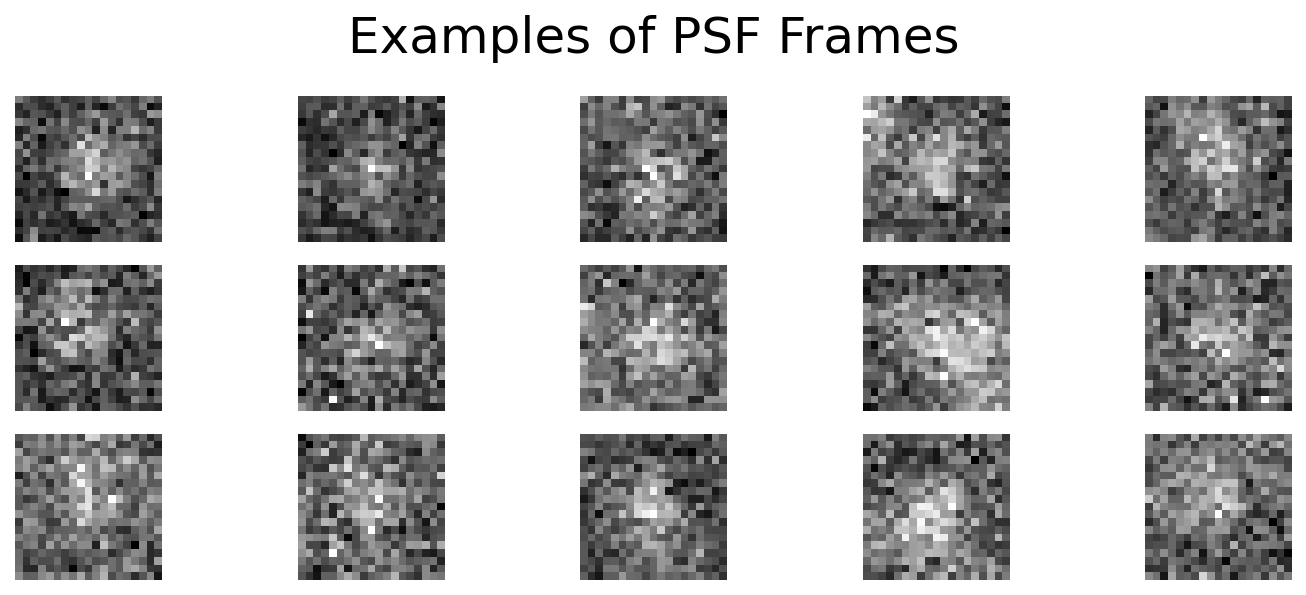

In [5]:
show_PSFs(A647_PSFs_training)

In [6]:
minmass = 1500
separation = 15
diameter = 9
frame_size = 19
percentile =99.5
movie_frames = [0, 10, 25, 50, 100, 150]
plot = False
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    if plot:
        CF660_PSFs_training = get_PSF_frames(CF660_movies_testing[0], minmass, separation, diameter, frame_size, 
                                        percentile, print_progress=False, to_plot=True, movie_frames=movie_frames)
    CF660_PSFs_training = get_PSF_frames(CF660_movies_testing[0], minmass, separation, diameter, frame_size, 
                                        percentile, print_progress=True, to_plot=False)
    # CF660_PSFs_training = get_PSF_frames_movie_list(CF660_movies_training, minmass, separation, 
    #                                                diameter, frame_size, percentile, print_progress=True)

100%|██████████| 200/200 [00:10<00:00, 19.54it/s]


(1728, 19, 19)


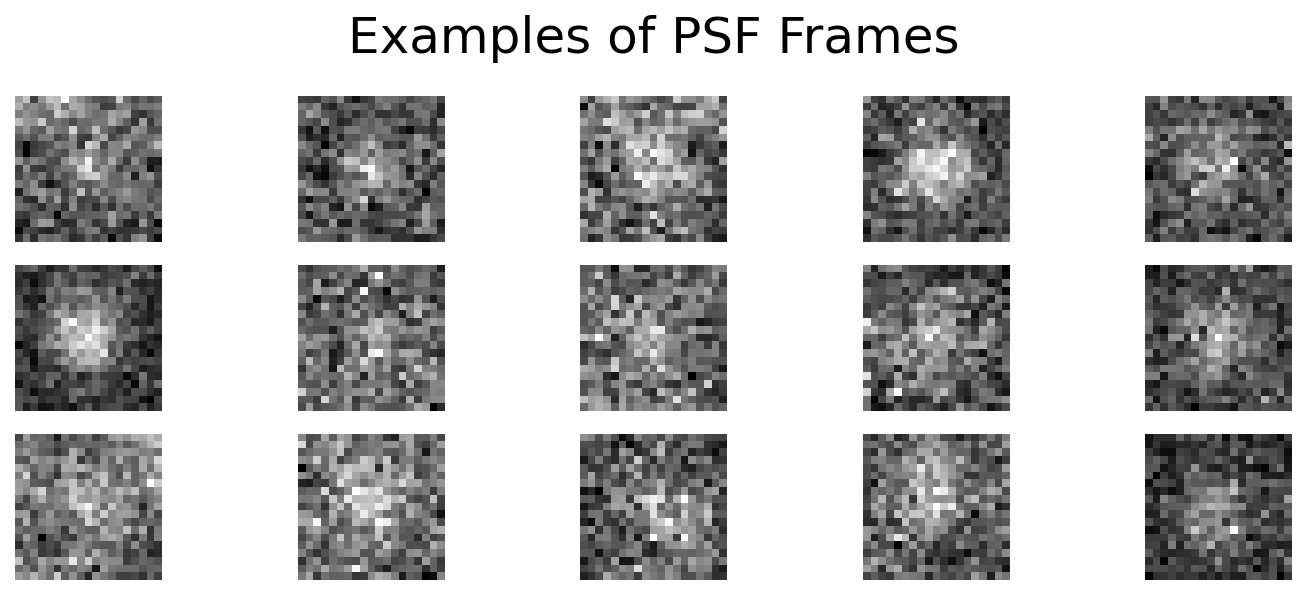

In [7]:
show_PSFs(CF660_PSFs_training)

In [8]:
PSF_Data = MultiPSFDataset.create_from_PSFs([A647_PSFs_training, CF660_PSFs_training], 
                                             class_names=["A647", "CF660c"])
PSF_Data.save('Pytorch Datasets/Real Data (A647 CF660c)/A647_vs_CF660c_most_normal_single_movie.pt')